In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = PG = pd.read_csv("4_stocks_1995_2017.csv", index_col = "Date")

In [4]:
data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.960464,2.498429,5.091914,4.479902
1995-01-04,8.888638,2.516591,5.228918,4.479902
1995-01-05,8.762941,2.475080,5.183250,4.490882
1995-01-06,8.780898,2.516591,5.183250,4.468922
1995-01-09,8.744981,2.501024,5.274583,4.425002


In [5]:
data.tail()

,PG,MSFT,F,GE
Date,,,,
2017-12-06,91.250000,82.779999,12.380,17.660000
2017-12-07,90.099998,82.489998,12.530,17.709999
2017-12-08,90.370003,84.160004,12.610,17.709999
2017-12-11,90.230003,85.230003,12.580,17.650000
2017-12-12,90.055000,85.650002,12.525,17.959999


### Normalization to 100

In [7]:
data.iloc[0] # iloc is first row of the dataframe

PG      8.960464
MSFT    2.498429
F       5.091914
GE      4.479902
Name: 1995-01-03, dtype: float64

In [18]:
base100=(data/data.iloc[0]*100)
base100_df = pd.DataFrame(base100)


In [19]:
base100_df.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,100.000000,100.000000,100.000000,100.000000
1995-01-04,99.198412,100.726937,102.690619,100.000000
1995-01-05,97.795616,99.065453,101.793746,100.245095
1995-01-06,97.996019,100.726937,101.793746,99.754905
1995-01-09,97.595180,100.103865,103.587433,98.774527


In [20]:
base100_df.tail()

,PG,MSFT,F,GE
Date,,,,
2017-12-06,1018.362442,3313.282026,243.130579,394.205052
2017-12-07,1005.528263,3301.674692,246.076426,395.321125
2017-12-08,1008.541555,3368.516936,247.647545,395.321125
2017-12-11,1006.979136,3411.343808,247.058375,393.981833
2017-12-12,1005.026079,3428.154332,245.978231,400.901605


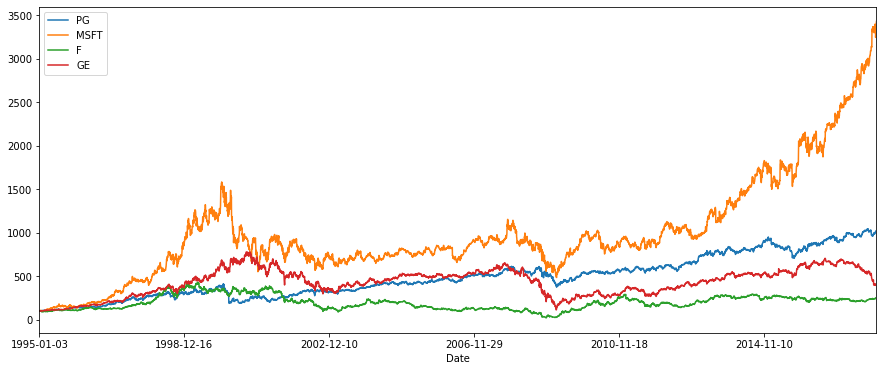

In [21]:
base100_df.plot(figsize = (15,6))
plt.show()

### Calculate return on portfolio of securities

In [22]:
returns = (data / data.shift(1)) -1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


### returns on equal weight portfolio

In [46]:
weights_ew = np.array([0.25,0.25,0.25,0.25])

In [47]:
np.dot(returns, weights_ew) # matrix multiplication

array([        nan,  0.00653992, -0.00922976, ...,  0.00740659,
        0.00134944,  0.00404499])

In [48]:
annual_returns = returns.mean() * 250
print(annual_returns)

PG      0.125201
MSFT    0.202795
F       0.118984
GE      0.102481
dtype: float64


In [49]:
return_ew = np.dot(annual_returns, weights)
pfolio_1 = str(round(return_ew * 100, 2)) + ' %'
print(pfolio_1)

13.74 %


### returns on custom weight portfolio

In [50]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [51]:
np.dot(returns, weights_2) # matrix multiplication

array([        nan,  0.00373732, -0.01344201, ...,  0.01025437,
        0.00393962,  0.0014177 ])

In [52]:
return_2 = np.dot(annual_returns, weights_2)
pfolio_2 = str(round(return_2 * 100, 2)) + ' %'
print(pfolio_2)

15.42 %
